In [1]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [2]:
Data_path='//content/drive/MyDrive/archive (7)/IMDB Dataset.csv'
df = pd.read_csv(Data_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Text(0.5, 1.0, 'Sentiment Field Distribution\n25000\n25000')

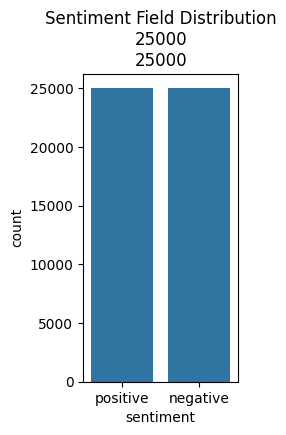

In [5]:
val_count=df["sentiment"].value_counts()
plt.figure(figsize= (2,4))
sns.countplot(data = df, x= 'sentiment')
plt.title(f'Sentiment Field Distribution\n{val_count.to_string(index=False, header=None)}')

In [6]:
df.loc[df["sentiment"] == 'positive', "sentiment"] = 1
df.loc[df["sentiment"] == 'negative', "sentiment"] = 0

In [7]:
df['sentiment'].unique()

array([1, 0], dtype=object)

In [8]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))
def clean_text(sentence):
    # Removing URLS
    sentence = re.sub(r"https?://\S+|www\.\S+"," ",sentence)

    # Removing html tags
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",sentence)

    # Removing the Punctuation
    sentence = re.sub(r"[^\w\s]", " ", sentence)

    # Removing words that have numbers
    sentence = re.sub(r"\w*\d\w*", " ", sentence)

    # Removing Digits
    sentence = re.sub(r"[0-9]+", " ", sentence)

    # Cleaning white spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()

    sentence = sentence.lower()
    # Check stop words
    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)

In [10]:
df.loc[:, 'review'] = df['review'].apply(clean_text)

In [11]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [12]:
df['review'][1]


'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done'

In [13]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 40000 40000
Test Data size 10000 10000


In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

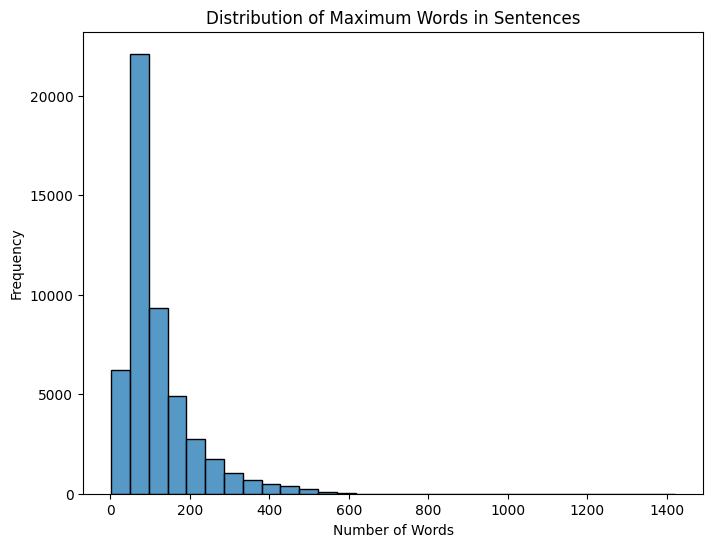

In [15]:
max_words = df['review'].apply(lambda x: len(x.split()))

# Plotting the distribution of the maximum number of words in sentences
plt.figure(figsize=(8, 6))
sns.histplot(max_words, bins=30)
plt.title('Distribution of Maximum Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [16]:
max_len = 200  # Maximum words in each sequence.
batch_size=512

In [17]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [18]:
vocabulary_size = len(tokenizer.word_index)
vocabulary_size

91086

In [19]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=128))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.5))

# Adding another hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Modify the previous dense layer to 64 units
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [21]:
history=model.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),batch_size=batch_size)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.5095 - loss: 0.6929 - val_accuracy: 0.5918 - val_loss: 0.6920
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.5469 - loss: 0.6907 - val_accuracy: 0.7524 - val_loss: 0.6538
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.7599 - loss: 0.6068 - val_accuracy: 0.8517 - val_loss: 0.3949
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.8705 - loss: 0.3705 - val_accuracy: 0.8731 - val_loss: 0.3059
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.9071 - loss: 0.2780 - val_accuracy: 0.8841 - val_loss: 0.2818


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │      11,659,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,409,221 (135.08 MB)

 Trainable params: 11,803,073 (45.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,606,148 (90.05 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step


Text(95.72222222222221, 0.5, 'Truth')

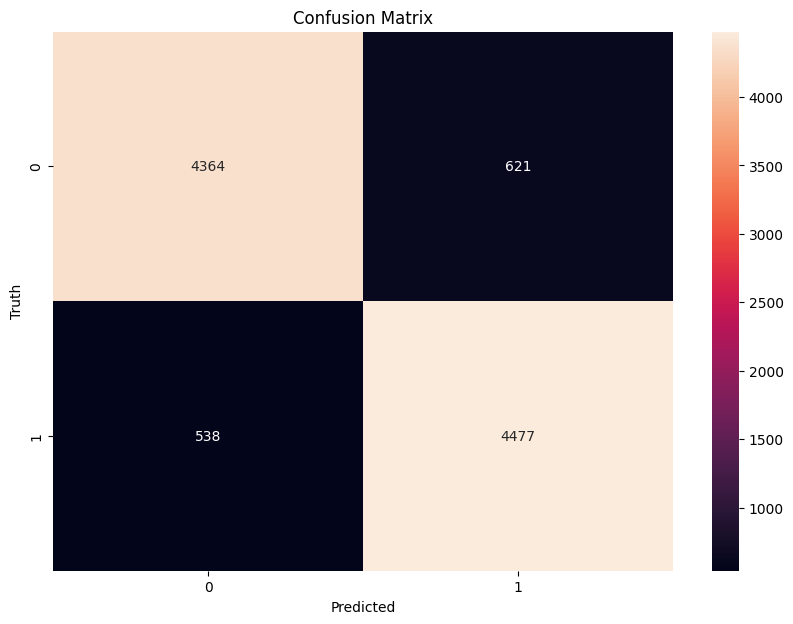

In [23]:
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4985
           1       0.88      0.88      0.88      5015

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

